# 📊 Analisis Data Peminjaman Sepeda
## 📌 Pendahuluan

Dataset ini berisi informasi tentang peminjaman sepeda berdasarkan berbagai faktor seperti musim, cuaca, hari kerja, dan lain-lain.  
Tujuan dari analisis ini adalah untuk memahami pola peminjaman sepeda dan faktor apa saja yang mempengaruhinya.

**Pertanyaan bisnis yang akan dijawab:**
1. Bagaimana pola peminjaman sepeda berdasarkan musim (Spring, Summer, Fall, Winter)?
2. Apakah ada pengaruh cuaca terhadap jumlah peminjaman sepeda?

Notebook ini akan melalui beberapa tahap analisis, termasuk:
- **Pembersihan data**
- **Eksplorasi data**
- **Visualisasi data**
- **Kesimpulan dari analisis**


In [1]:
import zipfile
import os

# Path file ZIP yang sudah kamu upload
zip_path = "/mnt/data/Bike-sharing-dataset.zip"
extract_path = "/mnt/data/bike_sharing_dataset"

# Ekstrak file ZIP ke dalam folder
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Menampilkan daftar file yang telah diekstrak
os.listdir(extract_path)


['Readme.txt', 'hour.csv', 'day.csv']

In [2]:
os.listdir(extract_path)


['Readme.txt', 'hour.csv', 'day.csv']

In [3]:
import pandas as pd

# Path ke file CSV yang ingin dibaca
file_path = os.path.join(extract_path, "day.csv")  # Ganti jika nama file berbeda

# Membaca dataset
df = pd.read_csv(file_path)

# Menampilkan 5 baris pertama
print(df.head())


   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


## 📊 Pengecekan Dataset

Sebelum melakukan analisis lebih lanjut, kita perlu memeriksa struktur dataset.  
Langkah-langkah yang dilakukan:
- Menampilkan beberapa baris pertama untuk melihat gambaran data (`df.head()`)
- Mengecek tipe data dan jumlah data yang tersedia (`df.info()`)
- Melihat statistik deskriptif (`df.describe()`)
- Mengecek data yang hilang (`df.isnull().sum()`)


In [4]:
print(df.info())  # Melihat tipe data dan jumlah data
print(df.describe())  # Statistik deskriptif


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None
          instant      season          yr        mnth     holiday     weekday  \
count  

In [5]:
df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [6]:
df.duplicated().sum()

0

## 🛠 Pembersihan Data

Sebelum melakukan analisis, kita harus memastikan bahwa dataset dalam kondisi baik.  
Langkah-langkah yang dilakukan:
- **Menghapus duplikasi data** jika ada (`df.duplicated().sum()`)
- **Mengisi nilai yang kosong** menggunakan median (`df.fillna(df.median(), inplace=True)`)
- **Mengubah format tanggal** menjadi tipe data `datetime`


In [22]:
df.drop_duplicates(inplace=True)


In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [ ]:
df['dteday'] = pd.to_datetime(df['dteday'])


In [12]:
df.describe()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


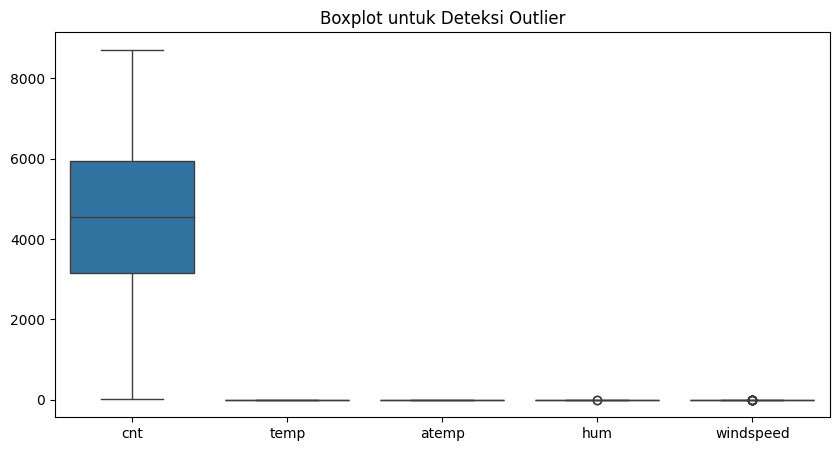

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.boxplot(data=df[['cnt', 'temp', 'atemp', 'hum', 'windspeed']])
plt.title("Boxplot untuk Deteksi Outlier")
plt.show()


## 🌦 Analisis Pola Peminjaman Berdasarkan Musim

Kita akan melihat bagaimana musim mempengaruhi jumlah peminjaman sepeda.  
Pada dataset ini, musim dikategorikan sebagai berikut:
- **1 = Spring**
- **2 = Summer**
- **3 = Fall**
- **4 = Winter**

Hasil analisis ini akan membantu memahami **musim mana yang memiliki jumlah peminjaman tertinggi**.


<ipython-input-14-4bb13e5a218a>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['season_label'], y=df['cnt'], estimator=sum, palette="coolwarm")


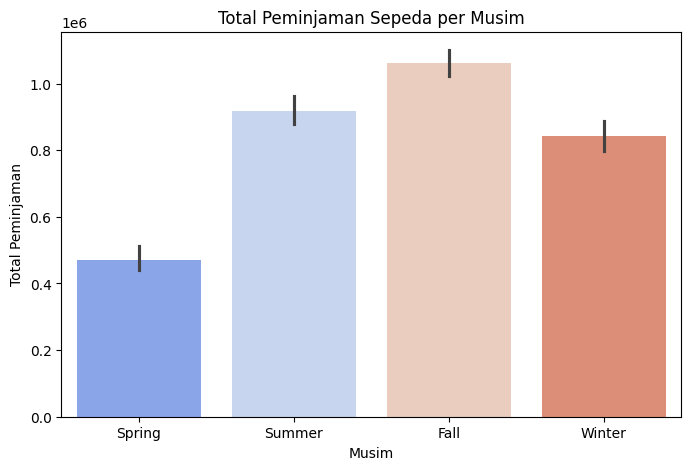

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mapping season values to actual labels
season_labels = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
df['season_label'] = df['season'].map(season_labels)

# Visualisasi jumlah peminjaman sepeda berdasarkan musim
plt.figure(figsize=(8,5))
sns.barplot(x=df['season_label'], y=df['cnt'], estimator=sum, palette="coolwarm")
plt.xlabel("Musim")
plt.ylabel("Total Peminjaman")
plt.title("Total Peminjaman Sepeda per Musim")
plt.show()


## 🌧 Analisis Pengaruh Cuaca terhadap Peminjaman Sepeda

Selain musim, cuaca juga mempengaruhi jumlah peminjaman sepeda.  
Kategori cuaca dalam dataset ini adalah:
- **1 = Clear (Cerah)**
- **2 = Cloudy (Berawan)**
- **3 = Light Rain/Snow (Hujan/Salju Ringan)**
- **4 = Heavy Rain/Snow (Hujan/Salju Lebat)**

Kita akan melihat bagaimana distribusi peminjaman sepeda pada berbagai kondisi cuaca.


<ipython-input-15-4143254a5bfe>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['weather_label'], y=df['cnt'], palette="coolwarm")


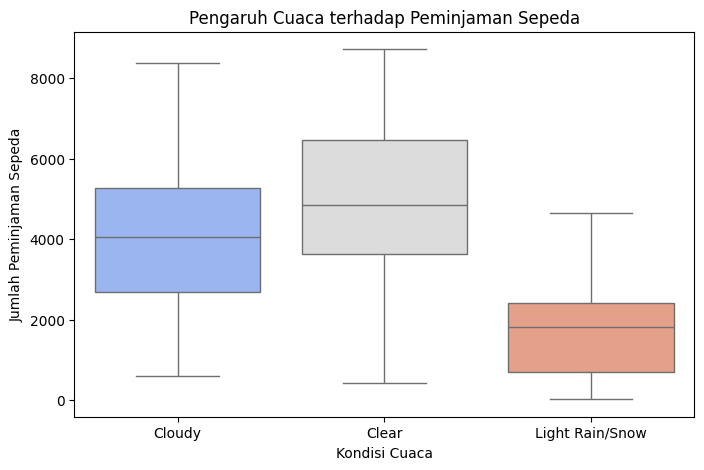

In [15]:
# Mapping weathersit values to actual labels
weather_labels = {1: 'Clear', 2: 'Cloudy', 3: 'Light Rain/Snow', 4: 'Heavy Rain/Snow'}
df['weather_label'] = df['weathersit'].map(weather_labels)

# Visualisasi pengaruh cuaca terhadap peminjaman sepeda
plt.figure(figsize=(8,5))
sns.boxplot(x=df['weather_label'], y=df['cnt'], palette="coolwarm")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.title("Pengaruh Cuaca terhadap Peminjaman Sepeda")
plt.show()


## 📌 Kesimpulan Analisis Data

### 1. Pola Peminjaman Berdasarkan Musim  
Dari hasil visualisasi **Total Peminjaman Sepeda per Musim**, terlihat bahwa:  
- **Musim Fall (Gugur) memiliki jumlah peminjaman tertinggi**, diikuti oleh **Summer (Musim Panas)**.  
- **Musim Spring (Semi) memiliki jumlah peminjaman terendah**.  
- Kemungkinan besar, musim gugur dan musim panas memiliki lebih banyak peminjaman sepeda karena cuaca yang lebih nyaman, suhu lebih hangat, dan lebih banyak kegiatan luar ruangan.  
- Sebaliknya, musim semi cenderung memiliki cuaca yang tidak stabil, dengan kemungkinan hujan lebih tinggi, sehingga peminjaman lebih sedikit.

### 2. Pengaruh Cuaca terhadap Peminjaman  
Dari visualisasi **Pengaruh Cuaca terhadap Peminjaman Sepeda**, kita bisa melihat bahwa:  
- **Cuaca cerah (Clear) memiliki jumlah peminjaman sepeda tertinggi**.  
- **Cuaca mendung atau berawan (Cloudy) memiliki jumlah peminjaman lebih rendah dibandingkan dengan cuaca cerah, tetapi masih cukup tinggi**.  
- **Cuaca hujan ringan atau salju ringan (Light Rain/Snow) menyebabkan jumlah peminjaman turun drastis**.  
- Hal ini menunjukkan bahwa kondisi cuaca sangat mempengaruhi keputusan orang untuk menggunakan sepeda. Cuaca buruk membuat orang lebih memilih moda transportasi lain.


In [17]:
import pandas as pd

# Path ke file CSV
file_path = os.path.join(extract_path, "day.csv")

# Membaca dataset
df = pd.read_csv(file_path)

# Menampilkan beberapa baris pertama
df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [18]:
# Hapus kolom yang tidak diperlukan
df.drop(columns=['instant'], inplace=True)

# Konversi kolom tanggal menjadi format datetime
df['dteday'] = pd.to_datetime(df['dteday'])

# Mapping season dan weather untuk lebih mudah dibaca
season_labels = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
df['season'] = df['season'].map(season_labels)

weather_labels = {1: 'Clear', 2: 'Cloudy', 3: 'Light Rain/Snow', 4: 'Heavy Rain/Snow'}
df['weathersit'] = df['weathersit'].map(weather_labels)

# Cek apakah ada missing values
df.isnull().sum()


,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0
atemp,0


In [19]:
# Simpan dataset yang telah dibersihkan
df.to_csv("main_data.csv", index=False)


In [20]:
from google.colab import files

# Download file CSV
files.download("main_data.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [21]:
import pandas as pd
df = pd.read_csv("main_data.csv")
print(df.head())  # Pastikan ada data
print(df.info())  # Pastikan tidak ada kolom kosong
print(df["season"].unique())  # Pastikan season memiliki nilai
print(df["weathersit"].unique())  # Pastikan weather memiliki nilai


       dteday  season  yr  mnth  holiday  weekday  workingday weathersit  \
0  2011-01-01  Spring   0     1        0        6           0     Cloudy   
1  2011-01-02  Spring   0     1        0        0           0     Cloudy   
2  2011-01-03  Spring   0     1        0        1           1      Clear   
3  2011-01-04  Spring   0     1        0        2           1      Clear   
4  2011-01-05  Spring   0     1        0        3           1      Clear   

       temp     atemp       hum  windspeed  casual  registered   cnt  
0  0.344167  0.363625  0.805833   0.160446     331         654   985  
1  0.363478  0.353739  0.696087   0.248539     131         670   801  
2  0.196364  0.189405  0.437273   0.248309     120        1229  1349  
3  0.200000  0.212122  0.590435   0.160296     108        1454  1562  
4  0.226957  0.229270  0.436957   0.186900      82        1518  1600  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column 